In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import cv2

In [2]:
#cargar los datos pca_50
datos = np.load('datos_pca_50.npz')
datos.files

['arr_0', 'arr_1']

In [3]:
datos.allow_pickle = True

In [4]:
x= datos['arr_0'] #con 50 componentes

In [5]:
y = datos['arr_1'] # variable indep

In [6]:
x

array([[ 0.88806669,  0.29448471,  0.28480911, ..., -0.78380617,
         0.01715913,  0.22137783],
       [ 1.17785295, -0.21138762,  0.33890305, ...,  0.47182827,
        -0.15666617, -1.63697566],
       [-0.76240637, -0.30511536,  0.39076673, ...,  0.86917022,
        -0.4683153 , -0.88850979],
       ...,
       [ 1.33939817,  0.60498636, -1.26395628, ..., -1.33431516,
         0.30075703, -1.80958864],
       [-1.25315424, -0.45646272, -0.57664332, ..., -0.05783125,
        -0.09654754,  0.28428154],
       [ 1.25781761,  0.97039796,  0.08263914, ...,  0.29201036,
         0.16245408,  0.47846427]])

In [7]:
y

array(['mujer', 'mujer', 'mujer', ..., 'hombre', 'hombre', 'hombre'],
      dtype=object)

In [8]:
#dividir la data en train y test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y)
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3474, 50) (869, 50) (3474,) (869,)


In [9]:
#entrenar el modelo  --> revisar que es SVC, para que se usa
model_svc = SVC(probability=True)
param_grid = {'C':[0.5,1,10,20,30,50], 
           'kernel':['rbf','poly'],
           'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],
           'coef0':[0,1]
          }

In [10]:
modelo_grid = GridSearchCV (model_svc, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2)

In [11]:
modelo_grid.fit(x_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END ..............C=0.5, coef0=0, gamma=0.1, kernel=rbf; total time=   2.2s
[CV] END ..............C=0.5, coef0=0, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END ..............C=0.5, coef0=0, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END .............C=0.5, coef0=0, gamma=0.1, kernel=poly; total time=   1.1s
[CV] END .............C=0.5, coef0=0, gamma=0.1, kernel=poly; total time=   1.1s
[CV] END .............C=0.5, coef0=0, gamma=0.1, kernel=poly; total time=   1.2s
[CV] END .............C=0.5, coef0=0, gamma=0.05, kernel=rbf; total time=   1.6s
[CV] END .............C=0.5, coef0=0, gamma=0.05, kernel=rbf; total time=   1.6s
[CV] END .............C=0.5, coef0=0, gamma=0.05, kernel=rbf; total time=   1.7s
[CV] END ............C=0.5, coef0=0, gamma=0.05, kernel=poly; total time=   1.3s
[CV] END ............C=0.5, coef0=0, gamma=0.05, kernel=poly; total time=   1.3s
[CV] END ............C=0.5, coef0=0, gamma=0.0

[CV] END .............C=1, coef0=0, gamma=0.002, kernel=poly; total time=   1.0s
[CV] END ..............C=1, coef0=0, gamma=0.005, kernel=rbf; total time=   1.2s
[CV] END ..............C=1, coef0=0, gamma=0.005, kernel=rbf; total time=   1.4s
[CV] END ..............C=1, coef0=0, gamma=0.005, kernel=rbf; total time=   1.4s
[CV] END .............C=1, coef0=0, gamma=0.005, kernel=poly; total time=   1.1s
[CV] END .............C=1, coef0=0, gamma=0.005, kernel=poly; total time=   1.0s
[CV] END .............C=1, coef0=0, gamma=0.005, kernel=poly; total time=   0.9s
[CV] END ................C=1, coef0=1, gamma=0.1, kernel=rbf; total time=   2.0s
[CV] END ................C=1, coef0=1, gamma=0.1, kernel=rbf; total time=   1.9s
[CV] END ................C=1, coef0=1, gamma=0.1, kernel=rbf; total time=   1.9s
[CV] END ...............C=1, coef0=1, gamma=0.1, kernel=poly; total time=   1.0s
[CV] END ...............C=1, coef0=1, gamma=0.1, kernel=poly; total time=   0.9s
[CV] END ...............C=1,

[CV] END ............C=10, coef0=1, gamma=0.001, kernel=poly; total time=   0.7s
[CV] END .............C=10, coef0=1, gamma=0.002, kernel=rbf; total time=   1.2s
[CV] END .............C=10, coef0=1, gamma=0.002, kernel=rbf; total time=   1.2s
[CV] END .............C=10, coef0=1, gamma=0.002, kernel=rbf; total time=   1.3s
[CV] END ............C=10, coef0=1, gamma=0.002, kernel=poly; total time=   0.8s
[CV] END ............C=10, coef0=1, gamma=0.002, kernel=poly; total time=   0.7s
[CV] END ............C=10, coef0=1, gamma=0.002, kernel=poly; total time=   0.8s
[CV] END .............C=10, coef0=1, gamma=0.005, kernel=rbf; total time=   1.3s
[CV] END .............C=10, coef0=1, gamma=0.005, kernel=rbf; total time=   1.4s
[CV] END .............C=10, coef0=1, gamma=0.005, kernel=rbf; total time=   1.5s
[CV] END ............C=10, coef0=1, gamma=0.005, kernel=poly; total time=   1.0s
[CV] END ............C=10, coef0=1, gamma=0.005, kernel=poly; total time=   0.9s
[CV] END ............C=10, c

[CV] END .............C=30, coef0=0, gamma=0.01, kernel=poly; total time=   1.1s
[CV] END .............C=30, coef0=0, gamma=0.001, kernel=rbf; total time=   1.2s
[CV] END .............C=30, coef0=0, gamma=0.001, kernel=rbf; total time=   1.2s
[CV] END .............C=30, coef0=0, gamma=0.001, kernel=rbf; total time=   1.4s
[CV] END ............C=30, coef0=0, gamma=0.001, kernel=poly; total time=   1.1s
[CV] END ............C=30, coef0=0, gamma=0.001, kernel=poly; total time=   1.0s
[CV] END ............C=30, coef0=0, gamma=0.001, kernel=poly; total time=   1.0s
[CV] END .............C=30, coef0=0, gamma=0.002, kernel=rbf; total time=   1.3s
[CV] END .............C=30, coef0=0, gamma=0.002, kernel=rbf; total time=   1.3s
[CV] END .............C=30, coef0=0, gamma=0.002, kernel=rbf; total time=   1.4s
[CV] END ............C=30, coef0=0, gamma=0.002, kernel=poly; total time=   1.0s
[CV] END ............C=30, coef0=0, gamma=0.002, kernel=poly; total time=   1.0s
[CV] END ............C=30, c

[CV] END .............C=50, coef0=1, gamma=0.05, kernel=poly; total time=   1.0s
[CV] END ..............C=50, coef0=1, gamma=0.01, kernel=rbf; total time=   1.8s
[CV] END ..............C=50, coef0=1, gamma=0.01, kernel=rbf; total time=   1.8s
[CV] END ..............C=50, coef0=1, gamma=0.01, kernel=rbf; total time=   1.9s
[CV] END .............C=50, coef0=1, gamma=0.01, kernel=poly; total time=   1.2s
[CV] END .............C=50, coef0=1, gamma=0.01, kernel=poly; total time=   1.2s
[CV] END .............C=50, coef0=1, gamma=0.01, kernel=poly; total time=   1.3s
[CV] END .............C=50, coef0=1, gamma=0.001, kernel=rbf; total time=   1.3s
[CV] END .............C=50, coef0=1, gamma=0.001, kernel=rbf; total time=   1.5s
[CV] END .............C=50, coef0=1, gamma=0.001, kernel=rbf; total time=   1.5s
[CV] END ............C=50, coef0=1, gamma=0.001, kernel=poly; total time=   1.0s
[CV] END ............C=50, coef0=1, gamma=0.001, kernel=poly; total time=   0.9s
[CV] END ............C=50, c

GridSearchCV(cv=3, estimator=SVC(probability=True),
             param_grid={'C': [0.5, 1, 10, 20, 30, 50], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [12]:
#mejor estimador
modelo_grid.best_params_

{'C': 1, 'coef0': 0, 'gamma': 0.05, 'kernel': 'rbf'}

In [14]:
modelo_final= modelo_grid.best_estimator_

In [15]:
modelo_final.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.05,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [16]:
#evaluamos el modelo -- hay 3 tipos de metricas 1. classification report, 2.kappa score 3.AUC
#1.- precision, recall, f1-score
#2.- -ve(worst model); 0 a 0.5 -> bad model; 0.5 a 0.7 buen modelo; 0.7 a 0.9 excelente; 0.9 a 1 perfecto
#3.- <0.5-> worst; 0.5-0.6-> bad; 0.6-0.8 good; 0.8-0.9 excelente; 0.9-1 perfecto
#ahora haremos la prediccion con la parte x_test, y_test
y_pred= modelo_final.predict(x_test)
y_pred


array(['mujer', 'mujer', 'mujer', 'mujer', 'mujer', 'mujer', 'mujer',
       'hombre', 'hombre', 'mujer', 'mujer', 'mujer', 'mujer', 'mujer',
       'mujer', 'mujer', 'hombre', 'mujer', 'mujer', 'hombre', 'mujer',
       'mujer', 'hombre', 'hombre', 'hombre', 'hombre', 'hombre', 'mujer',
       'mujer', 'mujer', 'mujer', 'mujer', 'hombre', 'hombre', 'mujer',
       'mujer', 'mujer', 'hombre', 'mujer', 'mujer', 'mujer', 'mujer',
       'mujer', 'hombre', 'mujer', 'hombre', 'hombre', 'hombre', 'hombre',
       'hombre', 'mujer', 'hombre', 'mujer', 'hombre', 'mujer', 'mujer',
       'hombre', 'mujer', 'mujer', 'mujer', 'mujer', 'mujer', 'mujer',
       'mujer', 'mujer', 'mujer', 'mujer', 'mujer', 'mujer', 'hombre',
       'mujer', 'hombre', 'hombre', 'mujer', 'hombre', 'hombre', 'mujer',
       'mujer', 'hombre', 'mujer', 'mujer', 'mujer', 'mujer', 'hombre',
       'hombre', 'mujer', 'hombre', 'mujer', 'mujer', 'hombre', 'hombre',
       'mujer', 'mujer', 'hombre', 'mujer', 'mujer', 'homb

In [18]:
#veremos con sklearn metrics Classification Report
cr = metrics.classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(cr).T


,precision,recall,f1-score,support
hombre,0.766756,0.731458,0.748691,391.000000
mujer,0.788306,0.817992,0.802875,478.000000
accuracy,0.779056,0.779056,0.779056,0.779056
macro avg,0.777531,0.774725,0.775783,869.000000
weighted avg,0.778610,0.779056,0.778495,869.000000


In [ ]:
#con estos datos vemos que la precision es mejor en el caso de las mujeres que en los hombres, lo mismo evidencia el f1-score (buscar que es eso!!!)

In [19]:
#ahora probaremos con Kappa Score
metrics.cohen_kappa_score(y_test, y_pred)

0.5517610079789377

In [ ]:
#de acuerdo a las metricas, el modelo cae en la categoria de "buen modelo"

In [20]:
#Ahora probamos con AUC - Area Under Curve //trabaja con numeros ==> ejecutando asi tendremos error (mostrarlo!)
#metrics.roc_auc_score(y_test, y_pred)
metrics.roc_auc_score(np.where(y_test=='hombre',1,0),
                      np.where(y_pred=='hombre',1,0))

0.774724716155336

In [ ]:
#con este ultimo, obtenemos un buen resultado -> good model

In [21]:
import cv2
import pickle
#en modelo_final tenemos nuestro machine learning
#necesitamos importar el xml que nos permite identificar caras
haar = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#y tb importar nuestro diccionario
pca_model = pickle.load(open('pca_dict.pickle',mode='rb'))

In [22]:
modelo_pca = pca_model['pca'] #mi pca model
prom_caras = pca_model['promedio'] #es mi mean_face

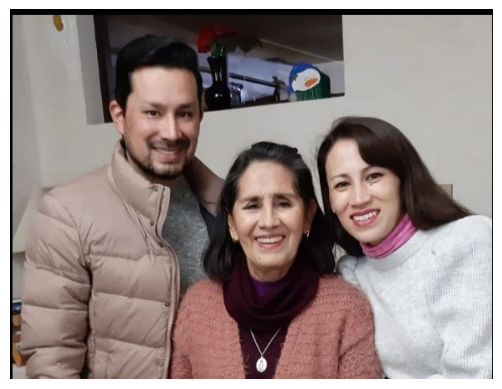

In [112]:
#una vez entrenado nuestro modelo --> vamos a probar con una imagen de prueba, para ellos seguiremos los sgtes pasos
#1, leer la imagen
import matplotlib.pyplot as plt
mi_img_test = cv2.imread('imagen_prueba7.jpg')
mi_img_test_rgb = cv2.cvtColor(mi_img_test, cv2.COLOR_BGR2RGB)
plt.imshow (mi_img_test_rgb)
plt.axis('off')
plt.show()


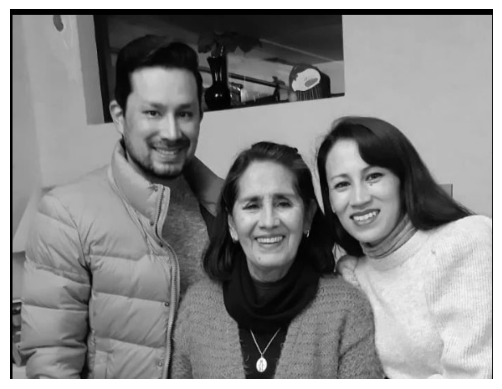

In [113]:
#2, convertir en escala de gris
gris = cv2.cvtColor(mi_img_test, cv2.COLOR_BGR2GRAY)

mi_img_test_rgb = cv2.cvtColor(gris, cv2.COLOR_BGR2RGB)
plt.imshow (mi_img_test_rgb)
plt.axis('off')
plt.show()
#3. recortar la cara usando haar cascade classifier


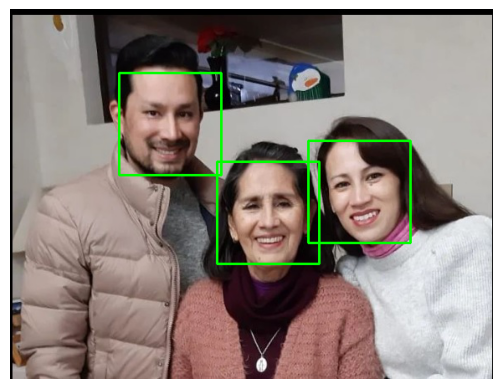

In [114]:
caras = haar.detectMultiScale(gris,1.5,3)
for x,y,w,h in caras:
    cv2.rectangle(mi_img_test,(x,y), (x+w, y+h),(0,255,0),2)
    
mi_img_test_rgb = cv2.cvtColor(mi_img_test, cv2.COLOR_BGR2RGB)
plt.imshow (mi_img_test_rgb)
plt.axis('off')
plt.show() 

In [122]:
mis_predicciones = [];
#4.- normalizacion
for x,y,w,h in caras:
    roi = gris[y:y+h, x:x+w]
    roi = roi / 255.0
    #5.- cambiar de tamano (100x100)
    if roi.shape[1] > 100:
        roi_nuevo =cv2.resize(roi, (100,100),cv2.INTER_AREA)
    else:
        roi_nuevo = cv2.resize(roi,(100,100,),cv2.INTER_CUBIC)
    #6.- manejo de alargue o achatamiento de la imagen (1x10000)
    roi_cambiado=roi_nuevo.reshape(1,10000)
    #7.- subtraccion respecto del promedio
    roi_prom = roi_cambiado - prom_caras
    #8.- obtener eigen image -> aplicar roi_prom al pca
    eigen_imagen = modelo_pca.transform(roi_prom)
    #9.- eigen imagen para visualizacion
    eigen_img = modelo_pca.inverse_transform(eigen_imagen)
    #10.- pasar a machine leari¡nig y obtener predicciones
    resultado = modelo_final.predict(eigen_imagen)
    res = modelo_final.predict_proba (eigen_imagen)
    probabilidad_max = res.max()
    #print (resultado, res)
    #11.- generar reporte
    final ="%s : %d"%(resultado,probabilidad_max*100)
    #poner color al resultado
    if resultado[0]=='hombre':
        color = (255,255,0)
    else:
        color = (255,0,255)
    cv2.rectangle(mi_img_test,(x,y), (x+w, y+h),color,2)
    cv2.rectangle(mi_img_test,(x,y-30),(x+w,y), color,-1)
    cv2.putText(mi_img_test,final,(x,y), cv2.FONT_HERSHEY_PLAIN,1,(255,255,255),5)
    
    salida = {
        'roi' : roi,
        'eigen': eigen_img,
        'nombre_pred': resultado[0],
        'score': probabilidad_max
    }
    mis_predicciones.append(salida)
    #print (final)

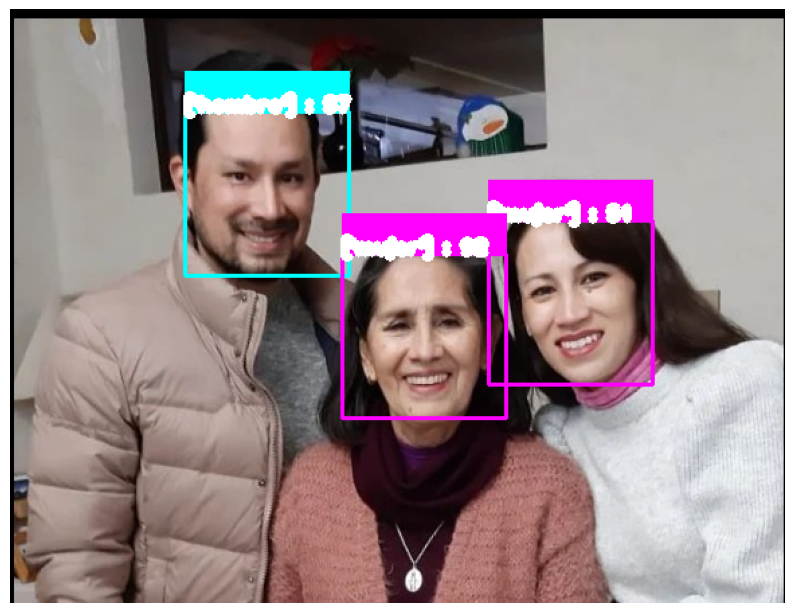

In [116]:
img_rgb =cv2.cvtColor(mi_img_test, cv2.COLOR_BGR2RGB)
plt.figure (figsize=(10,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [123]:
#para generar el reporte
mis_predicciones

[{'roi': array([[0.02745098, 0.02745098, 0.02352941, ..., 0.00392157, 0.14117647,
          0.28235294],
         [0.02352941, 0.02352941, 0.02352941, ..., 0.00784314, 0.2       ,
          0.37254902],
         [0.02352941, 0.02352941, 0.02352941, ..., 0.01568627, 0.18823529,
          0.43137255],
         ...,
         [0.6       , 0.62745098, 0.65098039, ..., 0.70196078, 0.69411765,
          0.70196078],
         [0.59607843, 0.61568627, 0.63921569, ..., 0.70588235, 0.70588235,
          0.70980392],
         [0.59607843, 0.60784314, 0.61960784, ..., 0.71372549, 0.69411765,
          0.69019608]]),
  'eigen': array([[-0.2706036 , -0.28793825, -0.3047633 , ...,  0.28678068,
           0.30387177,  0.31823195]]),
  'nombre_pred': 'hombre',
  'score': 0.570809077682702},
 {'roi': array([[0.72156863, 0.71372549, 0.70980392, ..., 0.29803922, 0.37647059,
          0.50588235],
         [0.72156863, 0.70980392, 0.70588235, ..., 0.21960784, 0.28627451,
          0.41176471],
         [0.7

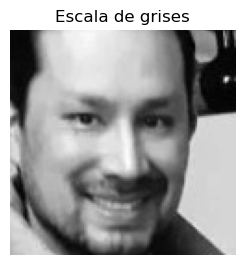

genero = hombre
score=57.08 %
----------------------------------------------------------------------------------------------------


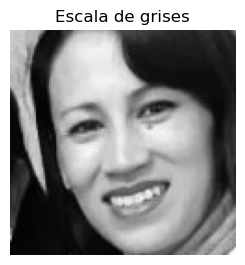

genero = mujer
score=51.28 %
----------------------------------------------------------------------------------------------------


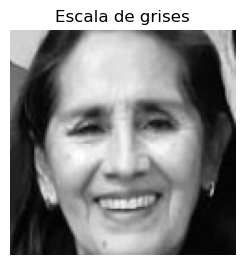

genero = mujer
score=92.35 %
----------------------------------------------------------------------------------------------------


In [127]:
for i in range(len(mis_predicciones)):
    obj_img = mis_predicciones[i]['roi'] #escala de grises
    obj_eigen = mis_predicciones[i]['eigen'].reshape(100,100) #escala de grises
    plt.subplot(1,2,1)
    plt.imshow(obj_img, cmap='gray')
    plt.title('Escala de grises')
    plt.axis('off')
    
    plt.show()
    print ('genero =', mis_predicciones[i]['nombre_pred'])
    print ('score={:,.2f} %'.format(mis_predicciones[i]['score']*100))
    print('-'*100)